In [165]:
#Batería de Librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#carga de la \"Data de Entrenamiento\"\n",
df = pd.read_csv('properties_colombia_train.csv')
df.head()

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY


In [166]:
df['prec_prom']= df['price'].mean()

In [167]:
df['prec_prom']

0         6.436051e+08
1         6.436051e+08
2         6.436051e+08
3         6.436051e+08
4         6.436051e+08
              ...     
197544    6.436051e+08
197545    6.436051e+08
197546    6.436051e+08
197547    6.436051e+08
197548    6.436051e+08
Name: prec_prom, Length: 197549, dtype: float64

NOTA IMPORTANTE: Por las limitaciones de recursos (Memoria y Procesador) se priorizará la eliminación de las columnas que amerite y/o corresponda.

In [ ]:
#ANALISIS EXPLORATORIO DEL DATAFRAME
df.head()
#Información Estadística de la información
df.describe()

In [ ]:
df.describe(include=object) #Los campos No-Numéricos también tienen información y casi siempre tienen candidatos a eliminarse

COLUMNA: 'ID' ==> Eliminación de columna id: contiene caracteres especiales
COLUMNA: 'UNNAMED: 0' ==> Renombrar columna "unname 0" como new_id: todos sus valores son únicos
COLUMNA: 'GEOMETRY' ==> Eliminación de columna "geometry": contiene data innecesaria (es un campo calcuado y asociado a latitud -lat- y longitud -lon-)

In [168]:
#El contenido de la columna "id" es desconocido en el sentido de que no guarda relación con ningún otro campo
#El contenido dela columna "unname 0" tampoco guarda relación con los demas datos del Data Frame. Sin embargo contiene solo números (ajeno de caráteres especiales)
#Es conveniente eliminar la columna "id" y renombrar la columna "unname 0" como new_id
df.drop(columns=['id','geometry'], inplace=True)
df.rename(columns={'Unnamed: 0':'new_id'}, inplace=True)

In [ ]:
df.head(1)

#Eliminar columnas innecesarias:
#Columnas de tipo No-Numéricas que tienen muy poca frecuencia en relación con el total de filas
#Ejemplo: 'l1' que corresponde a "País" (=Colombia). El dato unique indica que no hay un dato diferente a Colombia.


In [169]:
df.drop(columns=['l1'], inplace=True)

In [170]:
df.describe(include=object)

,ad_type,start_date,end_date,created_on,l2,l3,l4,l5,l6,currency,price_period,title,description,property_type,operation_type
count,197549,197549,197549,197549,197549,186517,45367,27409,6867,197482,35971,197548,197428,197549,197549
unique,1,145,446,145,31,293,58,20,146,2,1,95025,111371,8,1
top,Propiedad,2020-08-27,9999-12-31,2020-08-27,Antioquia,Medellín,Zona Norte,Usaquén,Chico Reservado,COP,Mensual,Apartamento en Venta Ubicado en MEDELLIN,En Rentahouse Finca Raiz contamos con más de 5...,Apartamento,Venta
freq,197549,6354,11974,6354,60636,43404,6736,6734,1138,197474,35971,12043,513,100527,197549


Más columnas innecesarias por eliminar
Analizando la frecuencia (freq) en relación al Total de Filas del DataFrame
----------------------------------------------------------------------------
COLUMNA "currency" que corresponde a "COP"             unique=2  Frecuencia=197,474  top=COP
El dato unique indica que de las 197,549 filas solo hay 2 datos diferentes y, uno de ellos, "COP", se repite 197,474 veces.
De manera que, el otro dato diferente a COP se repite solo 8 veces; es decir 0% (8/197549)

👀
NOTA:hay una diferencia de filas que corresponden a valores nulos que en número también resultan insignificantes: 
    TOTAL-FILAS     FILAS EN "currency"     currency= COP   currency= no COP    currency= nulos
    -----------     ------------------      -------------   ----------------    ---------------
    197,549             197,482                 197,474             8                   67




In [171]:
df.drop(columns=['currency'], inplace=True)

Eliminar solo (por ahora) columnas con unique=1 y freq=197549 (la cantidad total de filas)
Eliminaremos columas: ad_type ("Tipo de aviso"=Propiedad)   operation_type("Tipo operación"=Venta)

In [172]:
#Eliminación de columnas ( ad_type ("Tipo de aviso"=Propiedad)   operation_type("Tipo operación"=Venta) )
df.drop(columns=['ad_type', 'operation_type'], inplace=True)

In [173]:
len(df.columns) #El df inicial era de 27 columnas

22

In [174]:
df.describe(include=object)

,start_date,end_date,created_on,l2,l3,l4,l5,l6,price_period,title,description,property_type
count,197549,197549,197549,197549,186517,45367,27409,6867,35971,197548,197428,197549
unique,145,446,145,31,293,58,20,146,1,95025,111371,8
top,2020-08-27,9999-12-31,2020-08-27,Antioquia,Medellín,Zona Norte,Usaquén,Chico Reservado,Mensual,Apartamento en Venta Ubicado en MEDELLIN,En Rentahouse Finca Raiz contamos con más de 5...,Apartamento
freq,6354,11974,6354,60636,43404,6736,6734,1138,35971,12043,513,100527


COLUMNAS "stard_date", "end_date" y "created_on" (fechas respecto al aviso de venta)
Como se aprecia en el cuadro anterior 👆 para las columnas "start_date" y "created_on" existen 145 valores únicos y 6354 repeticiones para el mismo dato (2020-08-27)
Esto hace pensar que ambas columnas presentan datos idénticos. De confirmarse, serían columnas repetidas por lo que ameritaría eliminar la columna "created_on" y analizar la conveniencia de que existan/persistan "start_date" y "end_date".

ANÁLISIS:start_date y end_date
Siguiendo en el mismo enfoque y de la forma en que se entiende el problema a resolver, se considera que el tiempo -en días- que se tarda en vender una propiedad es un buen indicador respecto al precio y al grado y rápidez de respuesta por parte del mercado.
Es decir, mientras más rápido se venda una propiedad será correcto afirmar que: ES MUY PROBABLE QUE SEA BARATA !

Fusionando start_date y end_date:
--------------------------------
Como se explicó en el parrafo anterior, un buen indicador será el cálculo de "días en venta" de una propiedad. 💯
Por ello, crearemos el campo "days_to_sale" con la diferencia entre "start_date" y "end_date" y luego eliminaremos estos dos últimos campos.

In [175]:
import datetime
#Analicemos si las columnas son iguales. De ser iguales la diferencia en días debe ser CERO
df['fecha_ini'] = pd.to_datetime(df['start_date']) 
df['fecha_fin'] = pd.to_datetime(df['created_on']) 
df['dif_dias'] = df['fecha_fin'] - df['fecha_ini']  # difference in days

In [75]:
n=0
m=0
for x in df['dif_dias'].dt.days:
    if x == 0:
        n +=1
    else:
        m=+1

print(f"Hay {n} días con diferencia CERO y {m} días con diferencia mayor a cero: ")

Hay 197549 días con diferencia CERO y 0 días con diferencia mayor a cero: 


Se demuestra que las columnas "created_on" y "start_date" son idénticas, por lo que amerita eliminar 'created_on'
Adicionalmente, hemos visto que conviene calcular el tiempo en días para las propiedades vendidas: crearemos columna "days_to_sale" = "end_date" - "start_date"
*****************
Luego de fucionar "end_date" y "start_date" las eliminaremos.

Problema a resolver:
-------------------
Las propiedades no vendidas tienen "9999-12-31" como dato en el campo "end_date", por lo que, para efectuar la diferencia con "start_date" se hará:
  1. Sustituir la fecha 9999-12-31 por 2021-01-01
  2. Al hacer la diferencia se adicionará un día para que los cálculos correspondan en todo momento al año 2020

In [ ]:
#Las propiedades SIN vender tienen valor "9999-12-31"
#Creamos una serie -llamada 'serie'- para luego crear la columna 'days_to_sale' con esa serie
serie = list()
for x in df['end_date']:
    if x=='9999-12-31':
        x='2021-01-01'
        serie.append(x)    
    else:
        serie.append(x)

serie

In [177]:
#Introducimos valores de la serie en "days_to_sale"
df['fecha_fin'] = serie

In [178]:
#Calculamos diferencia en días y poblamos "days_to_sale"
import datetime

df['fecha_ini'] = pd.to_datetime(df['start_date']) 
df['fecha_fin'] = pd.to_datetime(df['fecha_fin']) 
df['days_to_sale'] = df['fecha_fin'] - df['fecha_ini'] - datetime.timedelta(days=1) # difference in days

In [179]:
df['days_to_sale']
#[dt.date for dt in df['fec_fin']]

0         17 days
1        239 days
2          0 days
3          6 days
4          0 days
           ...   
197544    65 days
197545    11 days
197546    65 days
197547    -1 days
197548    51 days
Name: days_to_sale, Length: 197549, dtype: timedelta64[ns]

Hemos construido un mejor indicador con el tiempo que tarda en venderse una propiedad y ahora sabemos que las propiedades que tienen "fecha_fin" = 2021-01-01
aún no han sido vendidas.
Adicionalmente, sabremos cuánto tardó en venderse una propiedad, al haber sido vendida.
----------------------------
Nos quedaremos con "fecha_fin", "fecha_ini" y "days_to_sale"
Eliminaremos: "create_on", "start_date", "end_date" y "dif_dias"

In [180]:
df.drop(columns={"created_on", "start_date", "end_date", "dif_dias"}, inplace=True)

In [181]:
df.describe(include=object)

,l2,l3,l4,l5,l6,price_period,title,description,property_type
count,197549,186517,45367,27409,6867,35971,197548,197428,197549
unique,31,293,58,20,146,1,95025,111371,8
top,Antioquia,Medellín,Zona Norte,Usaquén,Chico Reservado,Mensual,Apartamento en Venta Ubicado en MEDELLIN,En Rentahouse Finca Raiz contamos con más de 5...,Apartamento
freq,60636,43404,6736,6734,1138,35971,12043,513,100527


VALORES NULOS !
--------------

Calcularemos el % de valores faltantes para cada columna.
Normalmente se considera que valores faltantes superiores al 50% hacen a dicho campo/columna como innecesaria:candidata a eliminarse

In [182]:
print(round((df.isna().sum()/df.shape[0])*100),2)

new_id              0.0
lat                25.0
lon                25.0
l2                  0.0
l3                  6.0
l4                 77.0
l5                 86.0
l6                 97.0
rooms              86.0
bedrooms           79.0
bathrooms          21.0
surface_total      96.0
surface_covered    95.0
price               0.0
price_period       82.0
title               0.0
description         0.0
property_type       0.0
prec_prom           0.0
fecha_ini           0.0
fecha_fin           0.0
days_to_sale        0.0
dtype: float64 2


COLUMNAS A ELIMINAR:
l4 (Barrio): 77% de NULOS
l5 (Nivel administrativo nivel 5): 86% de NULOS
l6 (Nivel administrativo nivel 6): 97% de NULOS
rooms: 86% de NULOS
bedrooms: 79% de NULOS
surface_total: 96% de NULOS
surface_covered: 95% de NULOS
price_period: 82% de NULOS

In [183]:
df.drop(columns= {'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'surface_total', 'surface_covered','price_period'}, inplace=True)

DUPLICADOS !
-----------

1. Eliminar duplicados "imperdonables": existen filas que no tienen razón de ser si un campo está repetido
    Si se actualizó el aviso de venta de una propiedad, ésta será data duplicada y solo interesarán los datos mas recientes (mayor 'fecha_ini' )
    Identificándolas:
        Data duplicada si: Latitud (lat), Longitud (lon), Provincia (l2), Ciudad (l3), title y description son iguales SE ASUMEN COMO PROPIEDADES CON ANUNCIOS ACTUALIZADOS

        Se procederá a eliminar dichas filas, quedándonos con la fila más reciente, según columna "fecha_ini"

        Creamos una columna con datos agregados y al eliminarlos por dicha columna hacemos uso de la opción keep= last,
        previo ordenamiento del Data Frame por los campos "indica_duplos" (a crearse) y fecha_ini en forma descendente

In [184]:
df['indica_duplos'] = str(df['lat']) + str(df['lon']) + df['l2'] + df['l3'] + df['title'] + df['description']
    

In [186]:
df['indica_duplos'].info()
#Se encontraron 11,122 filas duplicadas ( = 197,549 - 186,427 )

<class 'pandas.core.series.Series'>
RangeIndex: 197549 entries, 0 to 197548
Series name: indica_duplos
Non-Null Count   Dtype 
--------------   ----- 
186427 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


In [187]:
#Ordenamiento del Data Frame
df.sort_values(by='fecha_ini', ascending=True)
#Eliminamos las filas duplicadas según campo creado "indica_duplos"
df.drop_duplicates('indica_duplos', inplace=True)

GRÁFICA DE CAMPOS NUMÉRICOS

count    1.079120e+05
mean     6.881701e+08
std      2.302102e+09
min      0.000000e+00
25%      2.000000e+08
50%      3.420000e+08
75%      6.500000e+08
max      3.450000e+11
Name: price, dtype: float64


<AxesSubplot:>

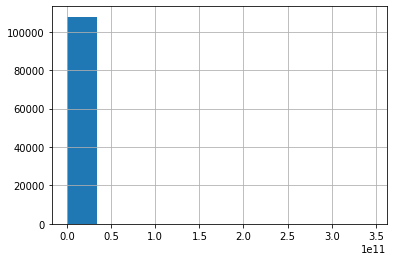

In [191]:
#Ver datos estadísticos del Precio (variable objetivo)
print(df['price'].describe())
df['price'].hist()

array([[<AxesSubplot:title={'center':'new_id'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lon'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'prec_prom'}>],
       [<AxesSubplot:title={'center':'fecha_ini'}>,
        <AxesSubplot:title={'center':'fecha_fin'}>, <AxesSubplot:>]],
      dtype=object)

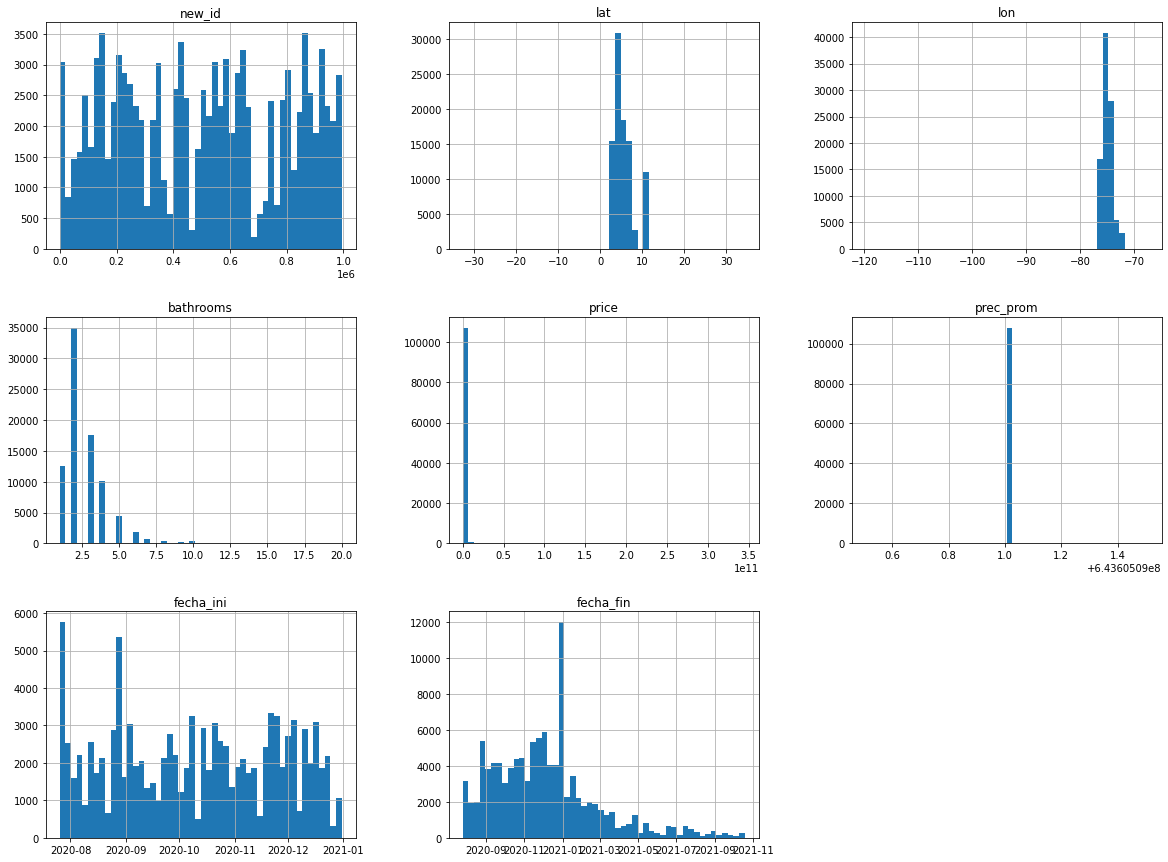

In [192]:
#Gráfica de los datos numéricos
df.hist(bins=50, figsize=(20,15))

Las gráficas que en esta etapa ayudan a tomar algunas decisiones son las de:
    Latitud-Longitud:
    Se aprecia cierta concentración en pocos distritos y para pocas ciudades. Lo que se corrobora con los datos estadísticos 
    df.describe(include=object)
    La concentración se presenta en la ciudad de Cundinamarca con 28,524 propiedades en venta. Cundinamarca es una de las 29 Provincias perteneciente a la ciudad de Bogotá D.C.
    

In [204]:
print(df['l2'].describe() , df['l3'].describe())

count           107970
unique              29
top       Cundinamarca
freq             28524
Name: l2, dtype: object count         107969
unique           293
top       Bogotá D.C
freq           21401
Name: l3, dtype: object


<AxesSubplot:>

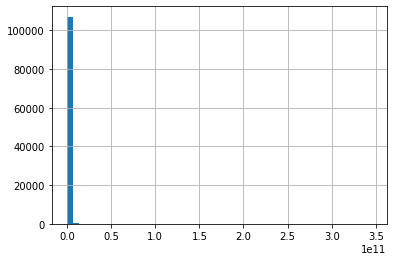

In [205]:
#Outliers en Precio?
#Según la gráfica
df['price'].hist(bins=50)
#Visualmente se pueden apreciar poquísimos datos que puedan ser candidatos a atípicos, respecto al conjunto muestral"

CORRELACIÓN DE VARIABLES

C:\Users\DUILIO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical left == right == 93.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
C:\Users\DUILIO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == 93.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\DUILIO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 93.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundar

array([[<AxesSubplot:xlabel='days_to_sale', ylabel='days_to_sale'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='days_to_sale'>,
        <AxesSubplot:xlabel='price', ylabel='days_to_sale'>],
       [<AxesSubplot:xlabel='days_to_sale', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='price', ylabel='bathrooms'>],
       [<AxesSubplot:xlabel='days_to_sale', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>]], dtype=object)

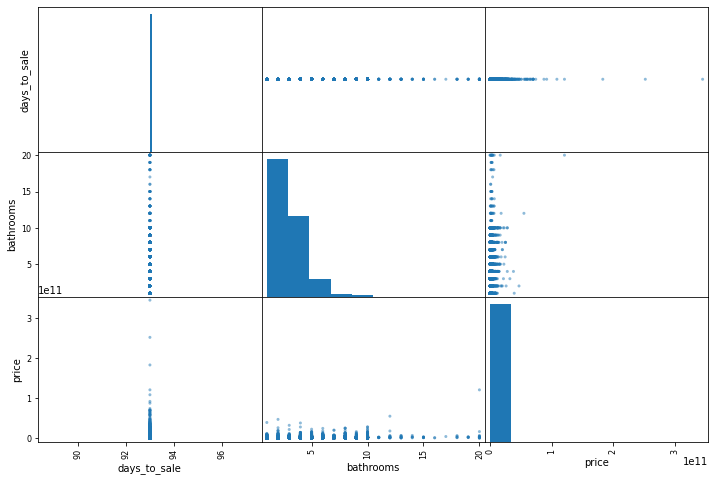

In [250]:
#Creamos una lista de atributos
atributos = ['days_to_sale','bathrooms','price']

from pandas.plotting import scatter_matrix

scatter_matrix(df[atributos], figsize=(12,8))

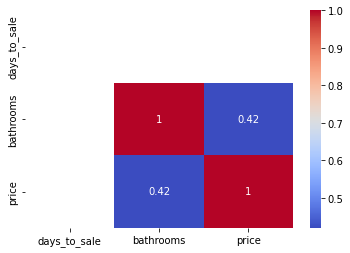

In [256]:
#MATRIZ DE CORRELACIÓN
import seaborn as sn

corrMatrix = df[atributos].corr().round(2)
sn.heatmap( corrMatrix, annot=True, cmap='coolwarm', linecolor='blue')
plt.show()

VARIABLES CATEGÓRICAS:


In [208]:
df.describe(include=object)

,l2,l3,title,description,property_type,indica_duplos
count,107970,107969,107970,107970,107970,107969
unique,29,293,86931,102077,8,107969
top,Cundinamarca,Bogotá D.C,Apartamento en Venta Ubicado en MEDELLIN,En Rentahouse Finca Raiz contamos con más de 5...,Apartamento,0 6.203000\n1 4.722748\n2 ...
freq,28524,21401,328,496,53823,1


Se aprecia que el campo "days_to_sale" no aparece. Se debe a que fue creado como datetime y lo que se necesita es un entero (int)
Lo convertiremos!

In [229]:
import datetime
df['days_to_sale'] = (df['days_to_sale'][50])/datetime.timedelta(days=1)

In [307]:
df.describe()
#AHORA YA APARECE COMO ENTERO ! 😲

,new_id,lat,lon,bathrooms,price,prec_prom,days_to_sale
count,107970.000000,94078.000000,94078.000000,83221.000000,1.079120e+05,1.079700e+05,107970.0
mean,499908.525322,5.712392,-75.008789,2.685728,6.881701e+08,6.436051e+08,93.0
std,292205.367637,2.218683,1.083715,1.473333,2.302102e+09,0.000000e+00,0.0
min,1.000000,-32.787342,-119.698190,1.000000,0.000000e+00,6.436051e+08,93.0
25%,234647.000000,4.603000,-75.608000,2.000000,2.000000e+08,6.436051e+08,93.0
50%,510507.500000,4.862922,-75.420642,2.000000,3.420000e+08,6.436051e+08,93.0
75%,778096.500000,6.247486,-74.077442,3.000000,6.500000e+08,6.436051e+08,93.0
max,993551.000000,34.420334,-67.482570,20.000000,3.450000e+11,6.436051e+08,93.0


In [231]:
df.describe(include=object)

,l2,l3,title,description,property_type,indica_duplos
count,107970,107969,107970,107970,107970,107969
unique,29,293,86931,102077,8,107969
top,Cundinamarca,Bogotá D.C,Apartamento en Venta Ubicado en MEDELLIN,En Rentahouse Finca Raiz contamos con más de 5...,Apartamento,0 6.203000\n1 4.722748\n2 ...
freq,28524,21401,328,496,53823,1


INSERTAMOS COLUMNA CON INDICADOR: BARATO o CARO
Comparamos columna "price" con "prec_prom"

In [637]:
df.dropna(subset=['price','prec_prom'])

,lat,lon,bathrooms,price,property_type,prec_prom,days_to_sale,target
0,6.203000,-75.572000,4.0,9.000000e+09,6,6.436051e+08,93.0,1
1,4.722748,-74.073115,2.0,6.250000e+08,7,6.436051e+08,93.0,0
2,4.709000,-74.030000,2.0,4.200000e+08,6,6.436051e+08,93.0,0
5,5.049009,-75.506802,2.0,1.679523e+08,7,6.436051e+08,93.0,0
6,4.732379,-74.082150,8.0,2.700000e+09,6,6.436051e+08,93.0,1
...,...,...,...,...,...,...,...,...
197529,6.341000,-75.552000,1.0,1.550000e+08,7,6.436051e+08,93.0,0
197535,4.716000,-74.031000,2.0,2.700000e+08,7,6.436051e+08,93.0,0
197540,4.812975,-75.663720,2.0,1.350000e+08,6,6.436051e+08,93.0,0
197542,7.064000,-73.106000,2.0,3.450000e+08,7,6.436051e+08,93.0,0


In [362]:
df['ind_prec'] = df['price'] - df['prec_prom']
#df['ind_prec'] es una columna temporal

In [368]:

indica=list()
for f in df['ind_prec']:
    if f > 0:
        indica.append(1) #baratp
    else:
        indica.append(0) #caro


In [369]:
df['target']=indica

In [236]:
df['property_type'].value_counts()

Apartamento        53823
Casa               35341
Lote                8208
Otro                8095
Local comercial     1030
Oficina             1005
Finca                463
Parqueadero            5
Name: property_type, dtype: int64

CONVERTIREMOS LA COLUMNA property_type en ORDINAL

In [565]:

from sklearn.preprocessing import OrdinalEncoder
ordinal_code = OrdinalEncoder()
ordinal_code.fit_transform(df[['property_type']])

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [5.]])

In [566]:
ordinal_code.categories_

[array(['Apartamento', 'Casa', 'Finca', 'Local comercial', 'Lote',
        'Oficina', 'Otro'], dtype=object)]

In [ ]:
reemplaza_property={"Apartamento":7, "Casa":6, "Finca":5, "Local comercial":4, "Lote":3, 'Oficina':2, 'Otro':1}
X.replace(reemplaza_property, inplace=True)

PIPELINE ! 

In [7]:
#Modulos para el Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [381]:
indica2=list()
for f in df['target']:
    if f > 0:
        indica2.append(1) #baratp
    else:
        indica2.append(0) #caro

In [491]:
df.drop(columns={'new_id'}, inplace=True)

In [8]:
#Armando la lista de Variables Numéricas y Categóricas
#Numéricas: lat, lon, bathrooms, price, days_to_sale
#Categóricas: l2, l3, title, description, property_type

numeric_list = ['lat', 'lon', 'bathrooms', 'price', 'days_to_sale', 'target', 'prec_prom']
categorical_list = [  'property_type']



Creación del Pipeline de Pre-procesamiento para datos numéricos y categóricos

In [9]:
#Transformaciones
numeric_transformer= Pipeline( steps=[ ('scaler', StandardScaler()) ] )
categorical_transformer = Pipeline( steps= [ ('onehot', OneHotEncoder() ) ] )

In [10]:
#Transformadores
transformer = ColumnTransformer ([
    ('num', numeric_transformer, numeric_list),
    ('cat', categorical_transformer, categorical_list)
])

PREPARAR LAS MUESTRAS PARA EL ENTRENAMIENTO
Traning: 70%
Test: 30%

In [528]:
X.dropna()

,lat,lon,bathrooms,price,property_type,prec_prom,days_to_sale,indica_duplos,target
0,6.203000,-75.572000,4.0,9.000000e+09,Casa,6.436051e+08,93.0,0 6.203000\n1 4.722748\n2 ...,1
1,4.722748,-74.073115,2.0,6.250000e+08,Apartamento,6.436051e+08,93.0,0 6.203000\n1 4.722748\n2 ...,0
2,4.709000,-74.030000,2.0,4.200000e+08,Casa,6.436051e+08,93.0,0 6.203000\n1 4.722748\n2 ...,0
5,5.049009,-75.506802,2.0,1.679523e+08,Apartamento,6.436051e+08,93.0,0 6.203000\n1 4.722748\n2 ...,0
6,4.732379,-74.082150,8.0,2.700000e+09,Casa,6.436051e+08,93.0,0 6.203000\n1 4.722748\n2 ...,1
...,...,...,...,...,...,...,...,...,...
197529,6.341000,-75.552000,1.0,1.550000e+08,Apartamento,6.436051e+08,93.0,0 6.203000\n1 4.722748\n2 ...,0
197535,4.716000,-74.031000,2.0,2.700000e+08,Apartamento,6.436051e+08,93.0,0 6.203000\n1 4.722748\n2 ...,0
197540,4.812975,-75.663720,2.0,1.350000e+08,Casa,6.436051e+08,93.0,0 6.203000\n1 4.722748\n2 ...,0
197542,7.064000,-73.106000,2.0,3.450000e+08,Apartamento,6.436051e+08,93.0,0 6.203000\n1 4.722748\n2 ...,0


In [541]:
X.dropna(subset=['lat','lon'])

,lat,lon,bathrooms,price,property_type,prec_prom,days_to_sale,indica_duplos,target
0,6.203000,-75.572000,4.0,9.000000e+09,Casa,6.436051e+08,93.0,0 6.203000\n1 4.722748\n2 ...,1
1,4.722748,-74.073115,2.0,6.250000e+08,Apartamento,6.436051e+08,93.0,0 6.203000\n1 4.722748\n2 ...,0
2,4.709000,-74.030000,2.0,4.200000e+08,Casa,6.436051e+08,93.0,0 6.203000\n1 4.722748\n2 ...,0
5,5.049009,-75.506802,2.0,1.679523e+08,Apartamento,6.436051e+08,93.0,0 6.203000\n1 4.722748\n2 ...,0
6,4.732379,-74.082150,8.0,2.700000e+09,Casa,6.436051e+08,93.0,0 6.203000\n1 4.722748\n2 ...,1
...,...,...,...,...,...,...,...,...,...
197529,6.341000,-75.552000,1.0,1.550000e+08,Apartamento,6.436051e+08,93.0,0 6.203000\n1 4.722748\n2 ...,0
197535,4.716000,-74.031000,2.0,2.700000e+08,Apartamento,6.436051e+08,93.0,0 6.203000\n1 4.722748\n2 ...,0
197540,4.812975,-75.663720,2.0,1.350000e+08,Casa,6.436051e+08,93.0,0 6.203000\n1 4.722748\n2 ...,0
197542,7.064000,-73.106000,2.0,3.450000e+08,Apartamento,6.436051e+08,93.0,0 6.203000\n1 4.722748\n2 ...,0


In [14]:
import pandas as pd
X=pd.read_csv('data3.csv')

In [15]:
#Crear y (valor de la columna 'price')

y = X['target']

In [16]:
#Dividir los datos para Entrentamiento y Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X,y,train_size=0.7)

In [17]:
#Observando las muestras creadas
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((49665, 8), (21285, 8), (49665,), (21285,))

Hemos creado los datos a usar en los Modelos !

MODELO DE REGRESIÓN LINEAL

In [18]:
#Obtenemos modelo lineal
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

In [19]:
#Antes de aplicar el modelo hay que transformar los datos
#Pipeline de la predicción completa
model_linear_regression = Pipeline( [ 
    ('transformer', transformer),
    ('linear_regression', linear_regression)
])

In [20]:
#Conseguiremos el ajuste
model_linear_regression.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'lon', 'bathrooms',
                                                   'price', 'days_to_sale',
                                                   'target', 'prec_prom']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['property_type'])])),
                ('linear_regression', LinearRegression())])

In [21]:
muestra=X_test.iloc[:4]

In [22]:
X_test.iloc[:4]

,lat,lon,bathrooms,price,property_type,prec_prom,days_to_sale,target
47875,11.006000,-74.806000,2,4.800000e+08,7,643605091,93,0
42767,4.643936,-74.060756,2,4.000000e+08,7,643605091,93,0
69826,4.716000,-73.967000,6,3.000000e+09,6,643605091,93,1
382,7.876192,-72.513364,2,5.500000e+07,6,643605091,93,0


In [23]:
model_linear_regression.predict(muestra)

array([-4.44089210e-16, -9.43689571e-16,  1.00000000e+00, -1.47104551e-15])

In [26]:
#CARGA DE DATA - TEST
test_file = pd.read_csv('target2.csv')

In [27]:
predicciones= model_linear_regression.predict(test_file)
#print(predicciones)
predicciones = pd.DataFrame(predicciones, columns=['pred'])
#print(predicciones)
predicciones.to_csv("duilius.csv",sep=',', index=False)
predicciones.value_counts()

pred    
0.999410    834
0.999410    423
0.999417    407
0.999417    381
0.999410    366
           ... 
0.000178      1
0.000178      1
0.000178      1
0.000178      1
1.002143      1
Length: 10735, dtype: int64

MODELO DE CEDISION-TREE

#Aplicamos Modelo Arbol de Decisión con DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

#1: Nombrar una variable para el modelo
tree_reg
#2: Definir el Pipeline: Transformación + Modelo
#3: Ajustar el Modeo

EVALUACION
4: Calcular el Score con Validación Cruzada CV=10
5: Realizar el cambio de signo y obtener raíz
6: Mostrar el resultado usando la función display_scores

In [624]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=  DecisionTreeRegressor( random_state = 42)

model_tree_reg = Pipeline(steps=[
    ('transformer', transformer),
    ('tree_reg', tree_reg)

])

model_tree_reg.fit(X_train, y_train)

ValueError: Input X contains NaN.
DecisionTreeRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
#X_train.dropna('price')
#df.describe(include='object')

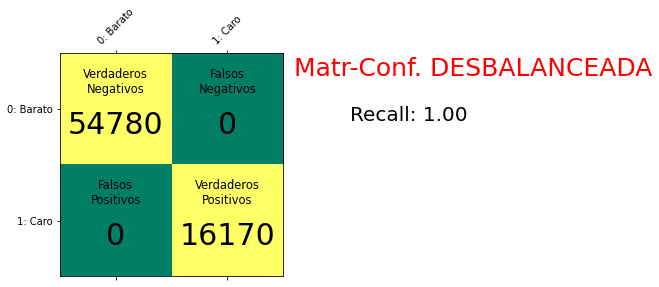

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import math

def matriz_de_confusion(clases_reales, clases_predichas, titulo):
    """Ver Matriz-Confusión"""

    matriz = confusion_matrix(clases_reales, clases_predichas)
    recall = recall_score(clases_reales, clases_predichas)

    #Matplotlib
    plt.figure(figsize=(4, 4))
    matriz = pd.DataFrame(matriz,
                    columns=["0: Barato", "1: Caro"])
    plt.matshow(matriz, cmap="summer", vmin=0, vmax=40, fignum=1)
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas = (("Verdaderos\nNegativos", "Falsos\nPositivos"),
                ("Falsos\nNegativos", "Verdaderos\nPositivos"))
    
    plt.text(1.60, -0.30, titulo, fontsize=25, c = "red")
    plt.text(2.1, 0.10, "Recall: %0.2f" % recall, fontsize=20)

    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j + 0.14, str(matriz.iloc[i,j]),
                    fontsize=30, ha = "center", va ="center")
            plt.text(i, j - 0.25, etiquetas[i][j],
                    fontsize=11.5, ha = "center", va= "center")
    plt.show()

clase = X["target"]
datos = X.drop(columns=["target"])
modelo = LogisticRegression().fit(datos, clase)
matriz_de_confusion(clase, modelo.predict(datos), "Matr-Conf. DESBALANCEADA")